<a href="https://colab.research.google.com/github/DulceOdete/DulceOdete/blob/master/Prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [374]:
import pandas as pd
import math
import io

date_info = pd.read_csv('date_info.txt')
store_info = pd.read_csv('store_info.txt')
store_sales = pd.read_csv('store_sales.csv')

# Transformación de datos

Se requiere modificar la columna "sales_date" para facilitar el proceso de análisis, para ello se transforma la columna a cierto tipo y después se eliminan valores innecesarios


In [376]:

store_sales['sales_date']= [col.replace("/", "-") for col in store_sales['sales_date']]


In [377]:
store_sales['sales_date']= [col.replace("#VALUE!", "00-00-0000") for col in store_sales['sales_date']]

In [378]:
aeliminar=[]
for i in range(len(store_sales)):
  if store_sales['sales_date'][i] == "00-00-0000":
    store_sales=store_sales.drop([i],axis=0)

In [379]:
store_sales.reset_index(inplace=True, drop=False)

In [380]:
store_sales.sales_date.value_counts()

25-02-2017    128
18-02-2017    124
25-03-2017    120
04-03-2017    115
24-03-2017    110
             ... 
17-05-2016      1
04-04-2016      1
24-01-2016      1
04-01-2016      1
31-05-2017      1
Name: sales_date, Length: 351, dtype: int64

In [381]:
store_sales['sales_date'] = pd.to_datetime(store_sales['sales_date'])



Se obtienen los dias correspondientes a cada semana

In [382]:
from datetime import date, timedelta
inicio=store_sales['sales_date'][0].date()

fecha1 = (inicio + timedelta(7))
fecha2 =(fecha1 + timedelta(7))
fecha3 = (fecha2 + timedelta(7))
fecha4 = (fecha3 + timedelta(7))


In [383]:
#se obtiene el indice para los campos que cumplan cn determinada fecha
indx1= indx2 = indx3 = indx4 =0
for i in range(len(store_sales)):
  if store_sales.sales_date[i] ==fecha1:
      indx1 = i 

for j in range(len(store_sales)):
  if fecha2 == store_sales.sales_date[j]:
      indx2 = j 

for k in range(len(store_sales)):
  if fecha3 == store_sales.sales_date[k]:
      indx3 = k 

for m in range(len(store_sales)):
  if fecha4 == store_sales.sales_date[m]:
      indx4 = m
  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: F

In [385]:
store_sales['sales_date'].min()

Timestamp('2016-01-01 00:00:00')

Sumatoria de ventas por semana

In [386]:
suma1=0
for n in range(0,22):
  suma1=suma1+store_sales['sales_count'][n]

suma2=0
for o in range(22,indx2):
  suma2=suma2+store_sales['sales_count'][o]

suma3=0
for p in range(indx2,indx3):
  suma3=suma3+store_sales['sales_count'][p]

suma4=0
for q in range(indx3,indx4):
  suma4=suma4+store_sales['sales_count'][q]


Obtención del crecimiento porcentual

In [282]:
#de semana 1 a semana 2
crecimiento1=((suma2/suma1)-1)*100
#de semana 2 a semana 3
crecimiento2=((suma3/suma2)-1)*100
#de semana 3 a semana 4
crecimiento3=((suma4/suma3)-1)*100



In [283]:
print('Crecimiento porcentual de la semana 1 a la semana 2:',round(crecimiento1),'%')
print('Crecimiento porcentual de la semana 2 a la semana 3:',round(crecimiento2),'%')
print('Crecimiento porcentual de la semana 3 a la semana 4:',round(crecimiento3),'%')

Crecimiento porcentual de la semana 1 a la semana 2: 145 %
Crecimiento porcentual de la semana 2 a la semana 3: 58 %
Crecimiento porcentual de la semana 3 a la semana 4: -39 %


In [ ]:
import seaborn as sb
sb.displot(x=eje_x, color='#F2AB6D', bins=6, kde=True) #creamos el gráfico en Seaborn

plt.ylabel('Frecuencia')
plt.xlabel('Ventas')
plt.title('Histograma ')

plt.show()

# Prediccion de ventas


Para calcular el pronóstico de ventas,se utilizó suavizado exponencial en Python, donde se hace una copia del dataframe original del archivo "store_sales" y se borran los datos no relevantes


In [394]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [362]:
datos= pd.DataFrame()
datos=store_sales
datos

,index,id,sales_date,sales_datetime,sales_count
0,0,db80363d35f10926,2016-01-01,01/01/2016 01:00,5
1,1,db80363d35f10926,2016-02-01,01/01/2016 16:00,2
2,2,db80363d35f10926,2016-02-01,01/01/2016 15:00,4
3,3,db80363d35f10926,2016-02-01,02/01/2016 14:00,2
4,4,db80363d35f10926,2016-02-01,02/01/2016 02:00,3
...,...,...,...,...,...
8271,12157,3cad29d1a23209d2,2017-05-27,09/02/2017 18:00,3
8272,12158,1033310359ceeac1,2017-05-28,15/04/2017 22:00,2
8273,12159,1033310359ceeac1,2017-05-28,18/04/2017 17:00,2
8274,12160,1033310359ceeac1,2017-05-30,19/04/2017 17:00,8


In [365]:
datos.drop(['index', 'id','sales_datetime'], axis = 'columns', inplace=True)
#del()
#datos.columns

In [366]:
datos.columns

Index(['sales_date', 'sales_count'], dtype='object')

In [434]:
ventas=datos2['sales_count']

In [ ]:
datos2=store_sales
datos2.drop(['index', 'id','sales_datetime'], axis = 'columns', inplace=True)

In [425]:
datos2

,sales_date,sales_count
sales_date,,
1,2016-01-01,5
2,2016-02-01,2
2,2016-02-01,4
2,2016-02-01,2
2,2016-02-01,3
...,...,...
5,2017-05-27,3
5,2017-05-28,2
5,2017-05-28,2


Se establece como índice los valores de fechas

In [426]:
datos2.index = store_sales['sales_date'].dt.strftime('%Y-%m')

In [403]:
datos2.index = store_sales['sales_date']

In [427]:
datos2

,sales_date,sales_count
sales_date,,
2016-01,2016-01-01,5
2016-02,2016-02-01,2
2016-02,2016-02-01,4
2016-02,2016-02-01,2
2016-02,2016-02-01,3
...,...,...
2017-05,2017-05-27,3
2017-05,2017-05-28,2
2017-05,2017-05-28,2


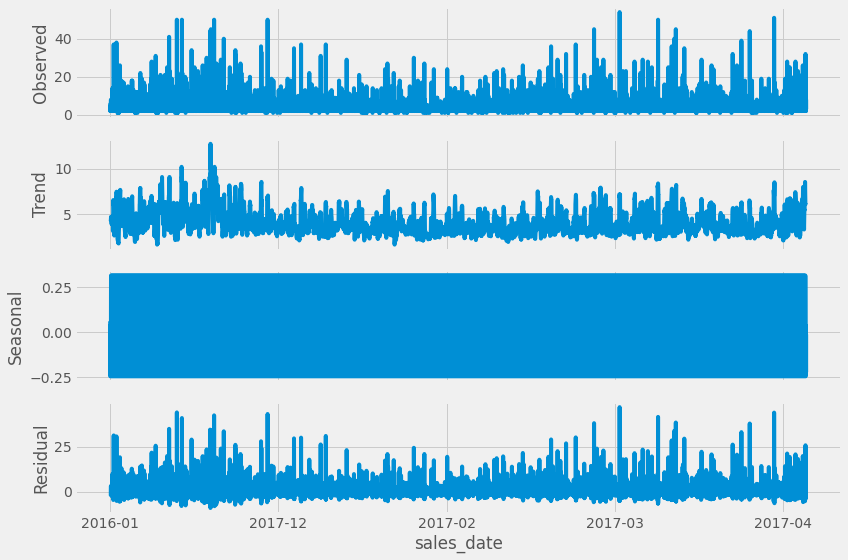

In [435]:
decomposition = seasonal_decompose(ventas, freq=12, model='additive')
plt.rcParams['figure.figsize'] = 12, 8
decomposition.plot()
plt.show()

Toma de muestras para entrenamiento y pruebas


Text(0.5, 1.0, 'Serie de tiempo para ventas')

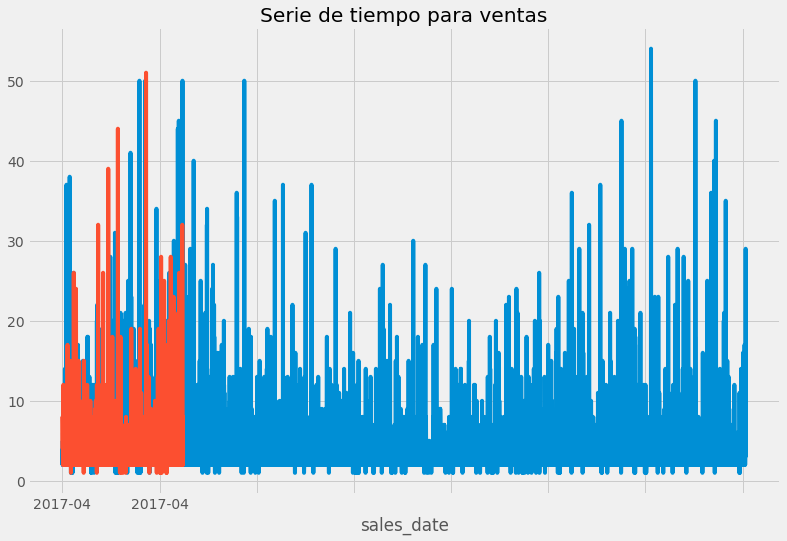

In [441]:
train = ventas[:int(0.85*(len(ventas)))]
test = ventas[int(0.85*(len(ventas))):]
train.plot()
test.plot()
plt.title('Serie de tiempo para ventas')

Pronóstico

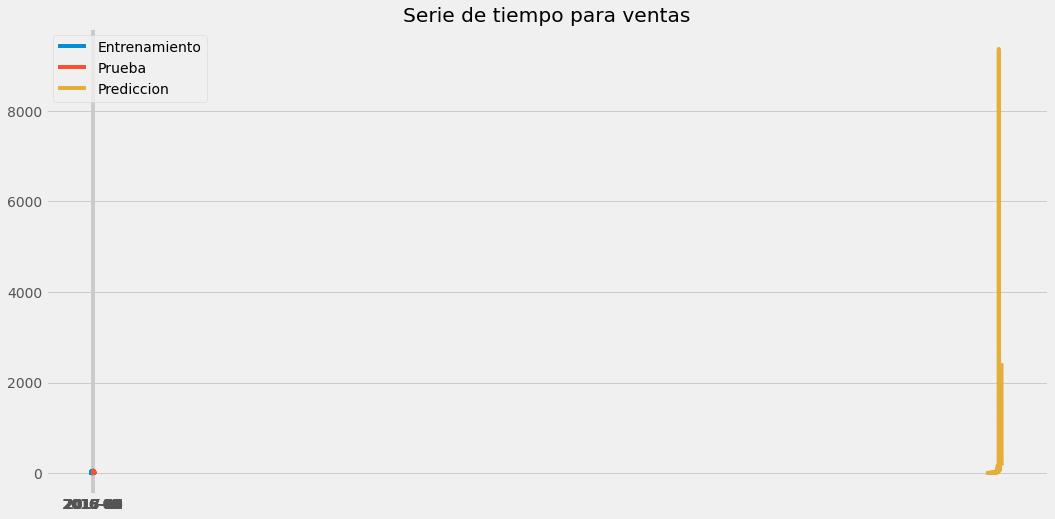

In [442]:

fit1 = ExponentialSmoothing(train ,seasonal_periods=12 ,trend='add', seasonal='add').fit(use_boxcox=True)
holt_winter1 = fit1.forecast(len(test)+17)
plt.figure(figsize=(16,8))
plt.plot( train, label='Entrenamiento')
plt.plot(test, label='Prueba')
plt.plot(holt_winter1, label='Prediccion')
plt.legend(loc='best')
plt.title('Serie de tiempo para ventas')
plt.show()